# **EDA** 

In [12]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('COVID19MEXICO2021.CSV')

# Mostrar las primeras filas
df.head()

/var/folders/bp/cbvyk0gd2pqct9s0s467rr3c0000gn/T/ipykernel_92665/1248396431.py:4: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('COVID19MEXICO2021.CSV')


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-08-09,z53cb3,2,12,9,2,9,9,2,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-08-09,zze974,1,6,24,1,24,24,35,1,...,1,1,2,2,97,7,99,México,97,97
2,2022-08-09,zz7202,1,12,16,2,16,16,112,1,...,1,1,2,2,97,7,99,México,97,97
3,2022-08-09,z405fd,1,12,9,2,9,9,11,1,...,1,2,97,1,2,7,99,México,97,97
4,2022-08-09,z26b82,2,12,9,1,9,9,7,1,...,2,2,97,1,2,7,99,México,97,97


In [13]:
# Verificar el número de filas y columnas
df.shape

# Verificar tipos de datos en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8830345 entries, 0 to 8830344
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

In [14]:
# Verificar la cantidad de valores nulos en cada columna
df.isnull().sum()

FECHA_ACTUALIZACION      0
ID_REGISTRO              0
ORIGEN                   0
SECTOR                   0
ENTIDAD_UM               0
SEXO                     0
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            0
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     0
NACIONALIDAD             0
EMBARAZO                 0
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             0
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               0
OTRO_CASO                0
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       0
CLASIFICACION_FINAL      0
MIGRANTE                 0
P

In [16]:
# Selección de las variables relevantes para el análisis de mortalidad
df_riesgo = df[['DIABETES', 'HIPERTENSION', 'OBESIDAD', 'EDAD', 'SEXO', 'FECHA_DEF']]

# Convertir '9999-99-99' a NaT (Not a Time) para pacientes no fallecidos
df_riesgo['FECHA_DEF'] = pd.to_datetime(df_riesgo['FECHA_DEF'], errors='coerce')

# Crear la columna binaria 'Mortalidad': 1 si el paciente falleció, 0 si no
df_riesgo['Mortalidad'] = df_riesgo['FECHA_DEF'].notnull().astype(int)

# Verificar las primeras filas de los datos con la nueva columna 'Mortalidad'
df_riesgo[['DIABETES', 'HIPERTENSION', 'OBESIDAD', 'EDAD', 'SEXO', 'Mortalidad']].head()

/var/folders/bp/cbvyk0gd2pqct9s0s467rr3c0000gn/T/ipykernel_92665/1059582264.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_riesgo['FECHA_DEF'] = pd.to_datetime(df_riesgo['FECHA_DEF'], errors='coerce')
/var/folders/bp/cbvyk0gd2pqct9s0s467rr3c0000gn/T/ipykernel_92665/1059582264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_riesgo['FECHA_DEF'] = pd.to_datetime(df_riesgo['FECHA_DEF'], errors='coerce')
/var/folders/bp/cbvyk0gd2pqct9s0s467rr3c0000gn/T/ipykernel_92665/1059582264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,DIABETES,HIPERTENSION,OBESIDAD,EDAD,SEXO,Mortalidad
0,2,2,2,26,2,0
1,2,2,2,34,1,0
2,2,2,2,41,2,0
3,2,2,2,25,2,0
4,2,2,2,20,1,0


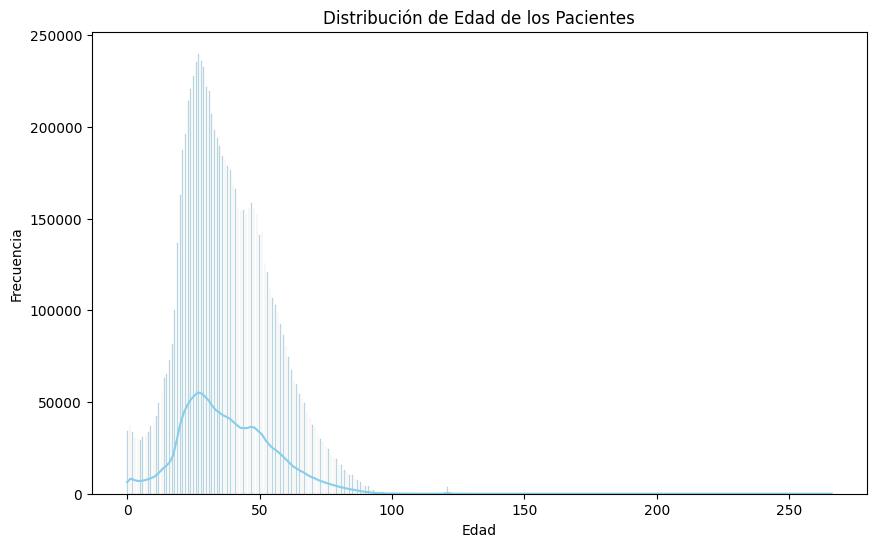

/var/folders/bp/cbvyk0gd2pqct9s0s467rr3c0000gn/T/ipykernel_92665/2727121789.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEXO', data=df_riesgo, palette='Set1')


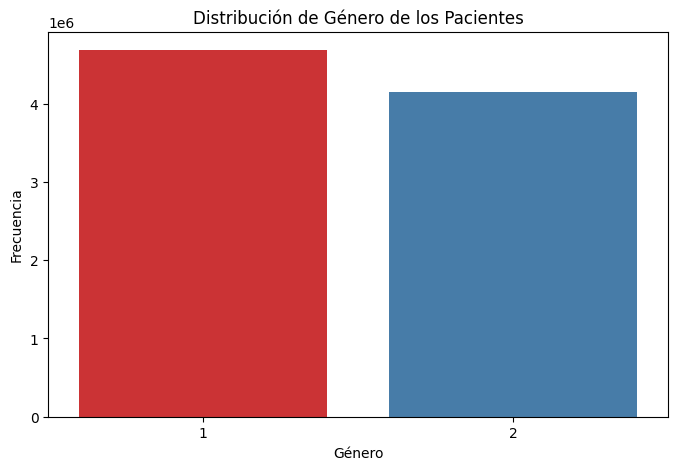

/var/folders/bp/cbvyk0gd2pqct9s0s467rr3c0000gn/T/ipykernel_92665/2727121789.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=comorbidity, data=df_riesgo, palette='Set1')


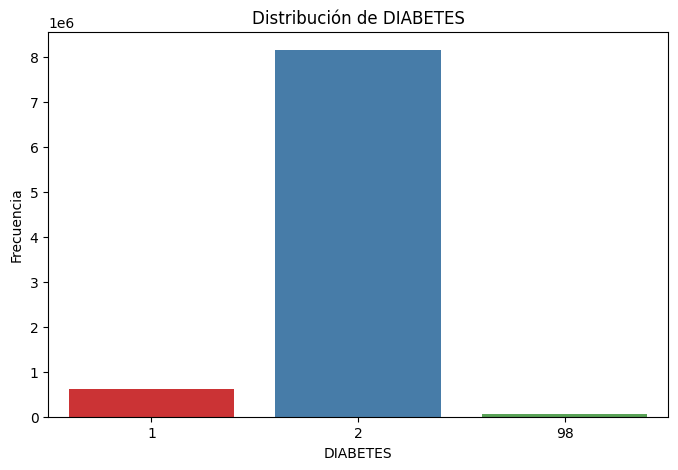

/var/folders/bp/cbvyk0gd2pqct9s0s467rr3c0000gn/T/ipykernel_92665/2727121789.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=comorbidity, data=df_riesgo, palette='Set1')


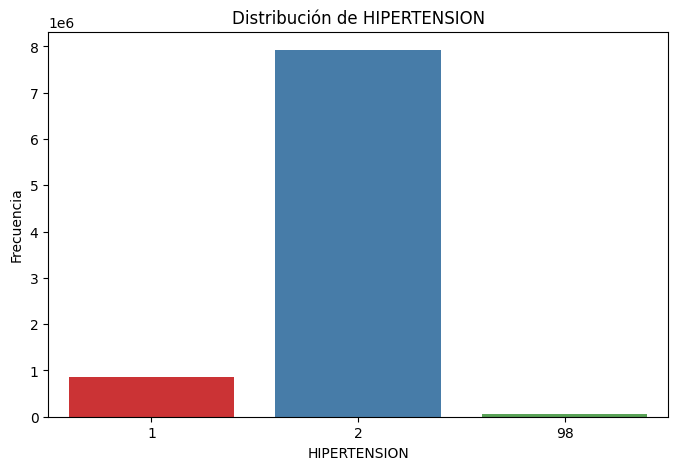

/var/folders/bp/cbvyk0gd2pqct9s0s467rr3c0000gn/T/ipykernel_92665/2727121789.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=comorbidity, data=df_riesgo, palette='Set1')


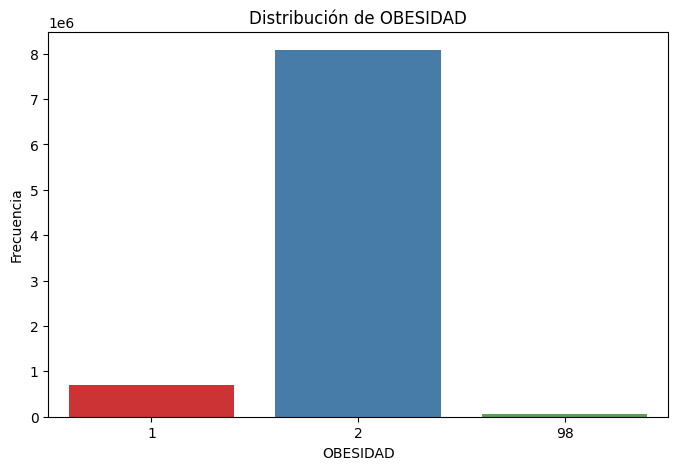

In [17]:
# Ver distribución de edad
plt.figure(figsize=(10, 6))
sns.histplot(df_riesgo['EDAD'], kde=True, color='skyblue')
plt.title('Distribución de Edad de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Ver distribución de género
plt.figure(figsize=(8, 5))
sns.countplot(x='SEXO', data=df_riesgo, palette='Set1')
plt.title('Distribución de Género de los Pacientes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Ver distribución de las comorbilidades
comorbilidades = ['DIABETES', 'HIPERTENSION', 'OBESIDAD']
for comorbidity in comorbilidades:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=comorbidity, data=df_riesgo, palette='Set1')
    plt.title(f'Distribución de {comorbidity}')
    plt.xlabel(comorbidity)
    plt.ylabel('Frecuencia')
    plt.show()

/var/folders/bp/cbvyk0gd2pqct9s0s467rr3c0000gn/T/ipykernel_92665/2810008413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mortalidad', y='EDAD', data=df_riesgo, palette='Set1')


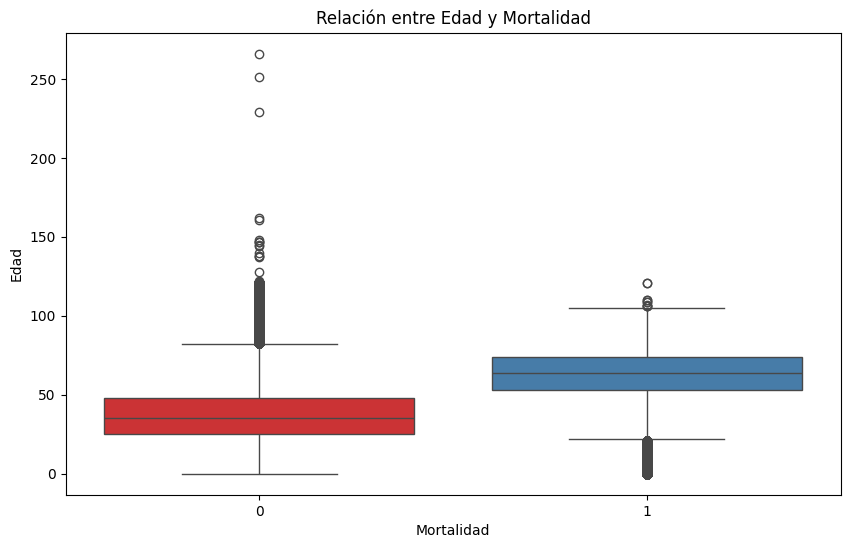

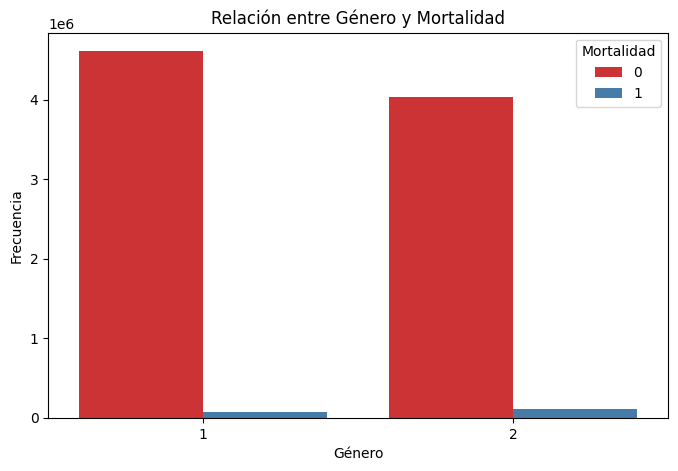

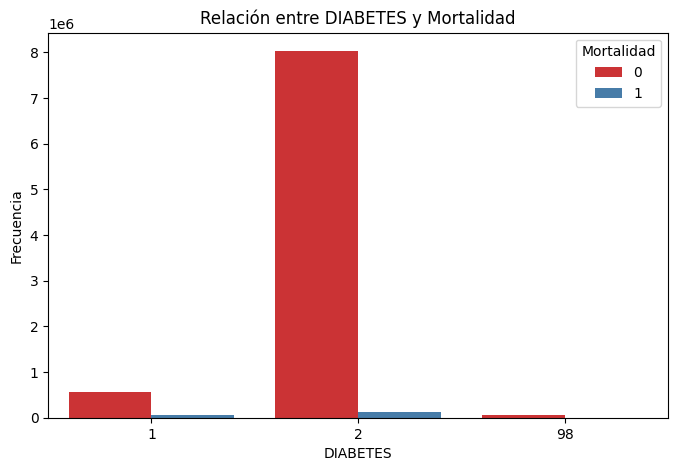

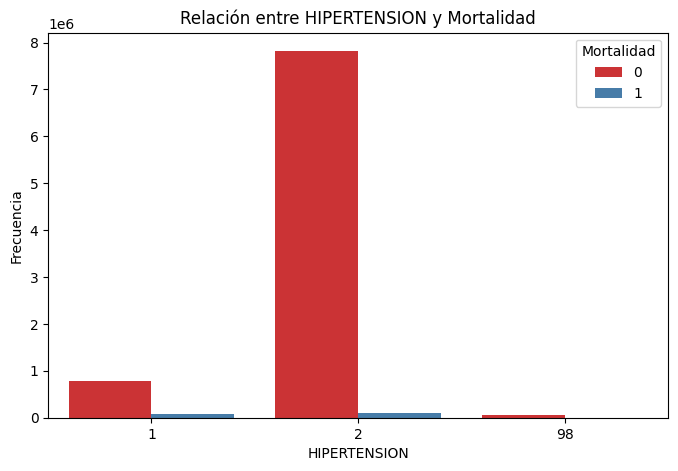

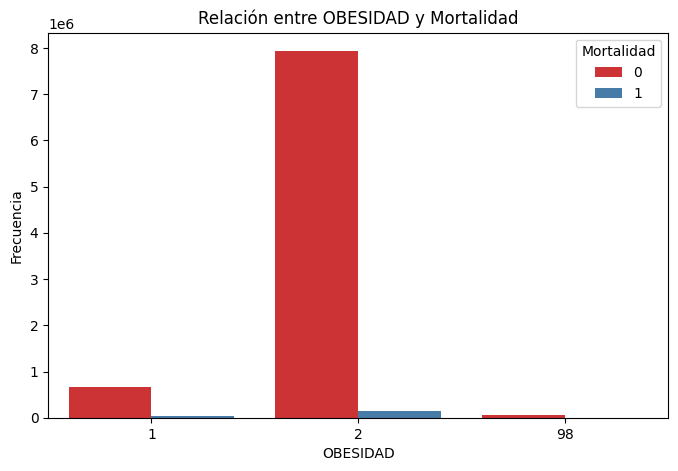

In [18]:
# Relación entre Edad y Mortalidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mortalidad', y='EDAD', data=df_riesgo, palette='Set1')
plt.title('Relación entre Edad y Mortalidad')
plt.xlabel('Mortalidad')
plt.ylabel('Edad')
plt.show()

# Relación entre Género y Mortalidad
plt.figure(figsize=(8, 5))
sns.countplot(x='SEXO', hue='Mortalidad', data=df_riesgo, palette='Set1')
plt.title('Relación entre Género y Mortalidad')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre comorbilidades y Mortalidad
for comorbidity in comorbilidades:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=comorbidity, hue='Mortalidad', data=df_riesgo, palette='Set1')
    plt.title(f'Relación entre {comorbidity} y Mortalidad')
    plt.xlabel(comorbidity)
    plt.ylabel('Frecuencia')
    plt.show()

# **Preprocesamiento de los Datos**

In [19]:
from sklearn.model_selection import train_test_split

# Variables independientes (edad, género y comorbilidades)
X = df_riesgo[['DIABETES', 'HIPERTENSION', 'OBESIDAD', 'EDAD', 'SEXO']]

# Variable dependiente (mortalidad)
y = df_riesgo['Mortalidad']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7064276, 5) (1766069, 5) (7064276,) (1766069,)


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo de Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1729815
           1       0.31      0.00      0.00     36254

    accuracy                           0.98   1766069
   macro avg       0.64      0.50      0.50   1766069
weighted avg       0.97      0.98      0.97   1766069

[[1729755      60]
 [  36227      27]]


In [35]:
from sklearn.metrics import roc_auc_score

# Calcular AUC-ROC para Random Forest
roc_auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])

print(f'AUC-ROC (Random Forest): {roc_auc_rf}')

AUC-ROC (Random Forest): 0.8846549149078188


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Asegurémonos de que X_train y X_test estén definidos y normalizarlos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from keras.models import Sequential
from keras.layers import Dense

# Crear el modelo de red neuronal
model_nn = Sequential()

# Capa de entrada (con el mismo número de nodos que las características de entrada)
model_nn.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Capa de entrada
model_nn.add(Dense(32, activation='relu'))  # Capa oculta
model_nn.add(Dense(16, activation='relu'))  # Capa oculta (puedes agregar más capas si lo deseas)
model_nn.add(Dense(1, activation='sigmoid'))  # Capa de salida (1 para mortalidad, 0 para no mortalidad)

# Compilar el modelo
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model_nn.summary()

/Users/antonioaguilar/Documents/ProyectoAnalitica/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model_nn.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/10
176607/176607 ━━━━━━━━━━━━━━━━━━━━ 92s 515us/step - accuracy: 0.9794 - loss: 0.0765 - val_accuracy: 0.9793 - val_loss: 0.0775
Epoch 2/10
176607/176607 ━━━━━━━━━━━━━━━━━━━━ 90s 510us/step - accuracy: 0.9794 - loss: 0.0760 - val_accuracy: 0.9793 - val_loss: 0.0757
Epoch 3/10
176607/176607 ━━━━━━━━━━━━━━━━━━━━ 91s 513us/step - accuracy: 0.9794 - loss: 0.0759 - val_accuracy: 0.9793 - val_loss: 0.0758
Epoch 4/10
176607/176607 ━━━━━━━━━━━━━━━━━━━━ 91s 513us/step - accuracy: 0.9794 - loss: 0.0758 - val_accuracy: 0.9793 - val_loss: 0.0757
Epoch 5/10
176607/176607 ━━━━━━━━━━━━━━━━━━━━ 92s 519us/step - accuracy: 0.9794 - loss: 0.0758 - val_accuracy: 0.9793 - val_loss: 0.0758
Epoch 6/10
176607/176607 ━━━━━━━━━━━━━━━━━━━━ 89s 503us/step - accuracy: 0.9794 - loss: 0.0758 - val_accuracy: 0.9793 - val_loss: 0.0758
Epoch 7/10
176607/176607 ━━━━━━━━━━━━━━━━━━━━ 89s 502us/step - accuracy: 0.9794 - loss: 0.0759 - val_accuracy: 0.9793 - val_loss: 0.0757
Epoch 8/10
176607/176607 ━━━━━━━━━━━━━━━━

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones
y_pred = model_nn.predict(X_test_scaled)
y_pred = (y_pred > 0.5)  # Convertir probabilidades a clases (1 para fallecidos, 0 para no fallecidos)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

55190/55190 ━━━━━━━━━━━━━━━━━━━━ 11s 207us/step


/Users/antonioaguilar/Documents/ProyectoAnalitica/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/antonioaguilar/Documents/ProyectoAnalitica/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/antonioaguilar/Documents/ProyectoAnalitica/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to co

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1729815
           1       0.00      0.00      0.00     36254

    accuracy                           0.98   1766069
   macro avg       0.49      0.50      0.49   1766069
weighted avg       0.96      0.98      0.97   1766069

[[1729815       0]
 [  36254       0]]


In [ ]:
from sklearn.metrics import roc_auc_score

# Calcular AUC-ROC
roc_auc_nn = roc_auc_score(y_test, model_nn.predict(X_test_scaled))

print(f'AUC-ROC: {roc_auc_nn}')

55190/55190 ━━━━━━━━━━━━━━━━━━━━ 12s 220us/step
AUC-ROC: 0.884011179474246


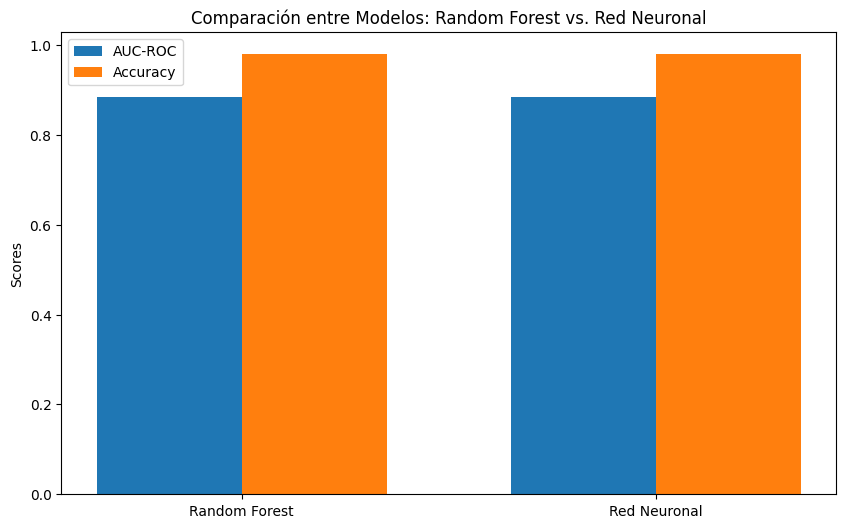

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para la comparación
models = ['Random Forest', 'Red Neuronal']
auc_scores = [roc_auc_rf, roc_auc_nn]
accuracy_scores = [model_rf.score(X_test, y_test), accuracy]
# Crear el gráfico de comparación
x = np.arange(len(models))  # Ubicaciones de las barras

# Gráfico de barras para AUC-ROC
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Ancho de las barras
rects1 = ax.bar(x - width/2, auc_scores, width, label='AUC-ROC')
rects2 = ax.bar(x + width/2, accuracy_scores, width, label='Accuracy')

# Añadir etiquetas y título
ax.set_ylabel('Scores')
ax.set_title('Comparación entre Modelos: Random Forest vs. Red Neuronal')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Mostrar el gráfico
plt.show()

55190/55190 ━━━━━━━━━━━━━━━━━━━━ 12s 210us/step


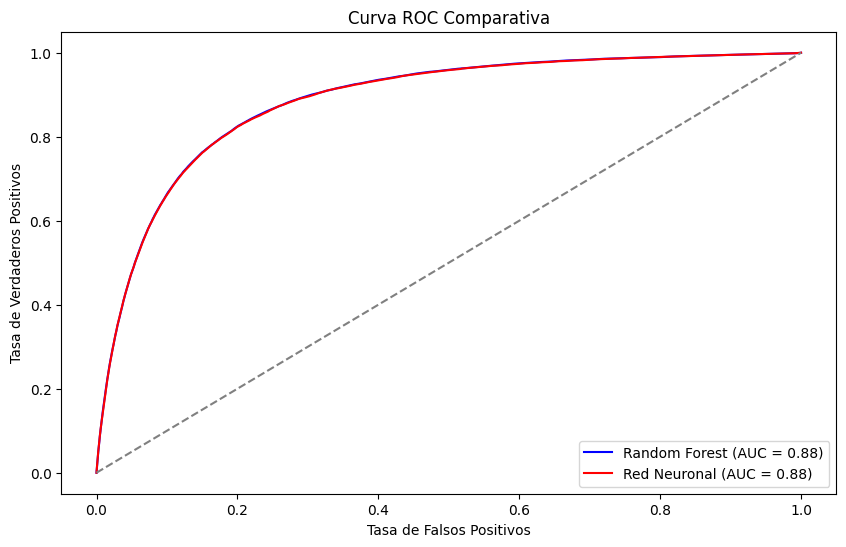

In [43]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calcular la curva ROC para la Red Neuronal
fpr_nn, tpr_nn, _ = roc_curve(y_test, model_nn.predict(X_test_scaled))
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Graficar la curva ROC para ambos modelos
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, color='red', label=f'Red Neuronal (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC Comparativa')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()